# This notebook demonstrates how to:

1. Collect Reddit data using PMAW/PRAW
2. Do sentiment analysis using VADER
3. Do sentiment analysis using EMPATH 

#### Credit: Darshan Satra (dsatra@iu.edu)



## 1. Script to collect data from Reddit using PMAW/PRAW

For installing praw:

In [ ]:
#pip install praw

### How to get Reddit Developer Credentials

1. Go to www.reddit.com/prefs/apps/ or https://old.reddit.com/prefs/apps

2. Create a new script application.

3. Use the following value for Redirect uri: http://localhost:8080

4. Refer to https://praw.readthedocs.io/en/stable/getting_started/authentication.html#application-only-client-credentials-flow to understand the pieces of information needed for authentication (e.g. client_id, client_secret, etc.).


### A script for getting submissions from a particular subreddit between two dates and creating a dataframe out of it.

In [9]:
import praw
import pandas as pd
from datetime import datetime, timedelta

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='NMKC3fTL-TdceOD-LS15iA',
                     client_secret='No1nyecxvPrwCmjXcnEx5Tsj4NuMAg',
                     user_agent='sahil',
                     username='LandscapeOdd4499',
                     password='Sahil@Feb16')
print(reddit.auth.scopes())
 

{'*'}


In [2]:
# Define the subreddit and time range for the search
import praw
import pandas as pd
from datetime import datetime, timedelta

subreddit = 'AskReddit'
start_date = datetime(2008, 1, 25)
end_date = datetime(2022, 5, 14) 

# Search for submissions in the subreddit during the specified time range
submissions = reddit.subreddit(subreddit).hot(limit=None)

# Create a list to store the data
data = []

# Iterate through the submissions and extract the desired data
for submission in submissions:
    submission_date = datetime.fromtimestamp(submission.created_utc) 
    if start_date <= submission_date <= end_date: 
        title = submission.title
        author = submission.author.name if submission.author else '[deleted]'
        score = submission.score
        created_utc = submission.created_utc
        data.append([title, author, score, created_utc])

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Title', 'Author', 'Score', 'Created_UTC'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data.csv', index=False)

### A script for getting X number of Reddit comments under a specific post

In [29]:
import praw
import pandas as pd

post_id = 'upogr0'
num_comments = 250

# Retrieve the submission by its ID
post = reddit.submission(id=post_id)

# Replace MoreComments objects with actual comments
post.comments.replace_more(limit=None)
comments = post.comments.list()

# Initialize an empty list to store comment data
data = []

# Initialize a counter for comments processed
comments_processed = 0

# Iterate through the comments and extract relevant information
for comment in comments:
    author = comment.author.name if comment.author else '[deleted]'
    text = comment.body
    date = comment.created_utc
    score = comment.score
    data.append([author, text, date, score])
    
    # Increment the counter
    comments_processed += 1
    
    # Break the loop if the desired number of comments is reached
    if comments_processed >= num_comments:
        break

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Author', 'Text', 'Date', 'Score'])

# Write the DataFrame to a CSV file
df.to_csv('redditDepression.csv', index=False)

In [30]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['Text'].apply(lambda x:remove_punctuation(x))
df.head()

,Author,Text,Date,Score,clean_msg
0,AutoModerator,**Attention! [Serious] Tag Notice**\n\n* [Joke...,1.652556e+09,1,Attention Serious Tag Notice\n\n Jokes puns an...
1,BuddhistSlater,Like being more bored than you could imagine b...,1.652557e+09,3822,Like being more bored than you could imagine b...
2,HatFromStraw,Complete lack of motivation.\n\nIgnoring peopl...,1.652557e+09,2007,Complete lack of motivation\n\nIgnoring people...
3,tenamonth,"Insecure about absolutely everything, no hope ...",1.652557e+09,1444,Insecure about absolutely everything no hope f...
4,slick1260,It feels like having the desire to *something*...,1.652558e+09,751,It feels like having the desire to something w...


In [31]:
import string
import re

def remove_punctuation_and_noise(text):
    # Remove punctuation
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_urls = url_pattern.sub('', punctuation_free)
    
    # Remove other noise (non-alphanumeric characters except spaces)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', no_urls)
    
    return cleaned_text

# Applying the function to the 'Text' column and storing the result in 'clean_msg'
df['clean_msg'] = df['Text'].apply(remove_punctuation_and_noise)
df.head(5)


,Author,Text,Date,Score,clean_msg
0,AutoModerator,**Attention! [Serious] Tag Notice**\n\n* [Joke...,1.652556e+09,1,Attention Serious Tag Notice\n\n Jokes puns an...
1,BuddhistSlater,Like being more bored than you could imagine b...,1.652557e+09,3822,Like being more bored than you could imagine b...
2,HatFromStraw,Complete lack of motivation.\n\nIgnoring peopl...,1.652557e+09,2007,Complete lack of motivation\n\nIgnoring people...
3,tenamonth,"Insecure about absolutely everything, no hope ...",1.652557e+09,1444,Insecure about absolutely everything no hope f...
4,slick1260,It feels like having the desire to *something*...,1.652558e+09,751,It feels like having the desire to something w...


In [33]:
import string
import re

def remove_punctuation_noise_and_newlines(text):
    # Remove punctuation
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_urls = url_pattern.sub('', punctuation_free)
    
    # Remove other noise (non-alphanumeric characters except spaces)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', no_urls)
    
    # Remove newline characters
    cleaned_text = cleaned_text.replace('\n', ' ')
    
    return cleaned_text

# Applying the function to the 'Text' column and storing the result in 'clean_msg'
df['clean_msg'] = df['Text'].apply(remove_punctuation_noise_and_newlines)
df.head(10)

,Author,Text,Date,Score,clean_msg
0,AutoModerator,**Attention! [Serious] Tag Notice**\n\n* [Joke...,1.652556e+09,1,Attention Serious Tag Notice Jokes puns and ...
1,BuddhistSlater,Like being more bored than you could imagine b...,1.652557e+09,3822,Like being more bored than you could imagine b...
2,HatFromStraw,Complete lack of motivation.\n\nIgnoring peopl...,1.652557e+09,2007,Complete lack of motivation Ignoring people t...
3,tenamonth,"Insecure about absolutely everything, no hope ...",1.652557e+09,1444,Insecure about absolutely everything no hope f...
4,slick1260,It feels like having the desire to *something*...,1.652558e+09,751,It feels like having the desire to something w...
5,Plastic_Phrase_8739,Same thing over and over. Nothing to look forw...,1.652557e+09,735,Same thing over and over Nothing to look forwa...
6,[deleted],not wanting and/or not having energy to do any...,1.652557e+09,471,not wanting andor not having energy to do anyt...
7,Lucile_B,"A constant heart ache, lack of energy and mise...",1.652558e+09,174,A constant heart ache lack of energy and miser...
8,Upbeat-Willingness40,Brain. Fog.,1.652558e+09,295,Brain Fog
9,PhilosopherDon0001,Not originally my description but I've found i...,1.652558e+09,282,Not originally my description but Ive found it...


In [4]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

# Assuming df is your DataFrame containing the data

# Read the DataFrame, excluding the first row
df = pd.read_csv("redditDepression.csv").iloc[1:]

def clean_text(text):
    # Remove punctuation
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    
    # Remove double quotes
    no_double_quotes = punctuation_free.replace('"', '')
    
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_urls = url_pattern.sub('', no_double_quotes)
    
    # Remove patterns like "wwwredditcomrAskRedditwikiindexwikirule6"
    no_specific_patterns = re.sub(r'\bwwwredditcomrAskRedditwikiindexwikirule6\b', '', no_urls, flags=re.IGNORECASE)
    
    # Remove other noise (non-alphanumeric characters except spaces)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', no_specific_patterns)
    
    # Remove newline characters
    cleaned_text = cleaned_text.replace('\n', ' ')
    
    return cleaned_text

# Apply the cleaning function to the 'Text' column and store the result in 'clean_msg'
df['clean_msg'] = df['Text'].apply(clean_text)

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

# Apply the sentiment analysis function to the 'clean_msg' column
df['sentiment_scores'] = df['clean_msg'].apply(get_sentiment_scores)

# Extracting compound sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Display the DataFrame with sentiment scores
df.head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Author,Text,Date,Score,clean_msg,sentiment_scores,compound_score
1,BuddhistSlater,Like being more bored than you could imagine b...,1.652557e+09,3822,Like being more bored than you could imagine b...,"{'neg': 0.096, 'neu': 0.763, 'pos': 0.142, 'co...",0.3030
2,HatFromStraw,Complete lack of motivation.\n\nIgnoring peopl...,1.652557e+09,2007,Complete lack of motivation Ignoring people t...,"{'neg': 0.198, 'neu': 0.435, 'pos': 0.368, 'co...",0.6486
3,tenamonth,"Insecure about absolutely everything, no hope ...",1.652557e+09,1444,Insecure about absolutely everything no hope f...,"{'neg': 0.194, 'neu': 0.614, 'pos': 0.191, 'co...",-0.0584
4,slick1260,It feels like having the desire to *something*...,1.652558e+09,751,It feels like having the desire to something w...,"{'neg': 0.091, 'neu': 0.647, 'pos': 0.261, 'co...",0.9843
5,Plastic_Phrase_8739,Same thing over and over. Nothing to look forw...,1.652557e+09,735,Same thing over and over Nothing to look forwa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,[deleted],not wanting and/or not having energy to do any...,1.652557e+09,471,not wanting andor not having energy to do anyt...,"{'neg': 0.236, 'neu': 0.723, 'pos': 0.04, 'com...",-0.8487
7,Lucile_B,"A constant heart ache, lack of energy and mise...",1.652558e+09,174,A constant heart ache lack of energy and miser...,"{'neg': 0.288, 'neu': 0.437, 'pos': 0.275, 'co...",-0.1742
8,Upbeat-Willingness40,Brain. Fog.,1.652558e+09,295,Brain Fog,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,PhilosopherDon0001,Not originally my description but I've found i...,1.652558e+09,282,Not originally my description but Ive found it...,"{'neg': 0.113, 'neu': 0.855, 'pos': 0.032, 'co...",-0.8554
10,Ko_ogs72,Like having no hope.\n\nLike your brain chemis...,1.652559e+09,125,Like having no hope Like your brain chemistry...,"{'neg': 0.345, 'neu': 0.551, 'pos': 0.104, 'co...",-0.9546


In [9]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

# Function to remove punctuation
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

# Function to get sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying punctuation removal and storing the cleaned text
df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying VADER sentiment analysis on cleaned text
df['sentiment_scores'] = df['clean_msg'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound scores (overall sentiment) from sentiment_scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Applying sentiment label
df['sentiment_label'] = df['compound_score'].apply(get_sentiment_label)

# Displaying the DataFrame with sentiment scores and labels
df.head(10)

,Author,Text,Date,Score,clean_msg,sentiment_scores,compound_score,sentiment_label,sentiment
1,BuddhistSlater,Like being more bored than you could imagine b...,1.652557e+09,3822,Like being more bored than you could imagine b...,"{'neg': 0.096, 'neu': 0.763, 'pos': 0.142, 'co...",0.3030,Positive,Positive
2,HatFromStraw,Complete lack of motivation.\n\nIgnoring peopl...,1.652557e+09,2007,Complete lack of motivation\n\nIgnoring people...,"{'neg': 0.198, 'neu': 0.435, 'pos': 0.368, 'co...",0.6486,Positive,Positive
3,tenamonth,"Insecure about absolutely everything, no hope ...",1.652557e+09,1444,Insecure about absolutely everything no hope f...,"{'neg': 0.2, 'neu': 0.646, 'pos': 0.154, 'comp...",-0.4636,Negative,Negative
4,slick1260,It feels like having the desire to *something*...,1.652558e+09,751,It feels like having the desire to something w...,"{'neg': 0.091, 'neu': 0.647, 'pos': 0.261, 'co...",0.9843,Positive,Positive
5,Plastic_Phrase_8739,Same thing over and over. Nothing to look forw...,1.652557e+09,735,Same thing over and over Nothing to look forwa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
6,[deleted],not wanting and/or not having energy to do any...,1.652557e+09,471,not wanting andor not having energy to do anyt...,"{'neg': 0.236, 'neu': 0.723, 'pos': 0.04, 'com...",-0.8487,Negative,Negative
7,Lucile_B,"A constant heart ache, lack of energy and mise...",1.652558e+09,174,A constant heart ache lack of energy and miser...,"{'neg': 0.288, 'neu': 0.437, 'pos': 0.275, 'co...",-0.1742,Negative,Negative
8,Upbeat-Willingness40,Brain. Fog.,1.652558e+09,295,Brain Fog,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
9,PhilosopherDon0001,Not originally my description but I've found i...,1.652558e+09,282,Not originally my description but Ive found it...,"{'neg': 0.113, 'neu': 0.855, 'pos': 0.032, 'co...",-0.8554,Negative,Negative
10,Ko_ogs72,Like having no hope.\n\nLike your brain chemis...,1.652559e+09,125,Like having no hope\n\nLike your brain chemist...,"{'neg': 0.345, 'neu': 0.551, 'pos': 0.104, 'co...",-0.9546,Negative,Negative


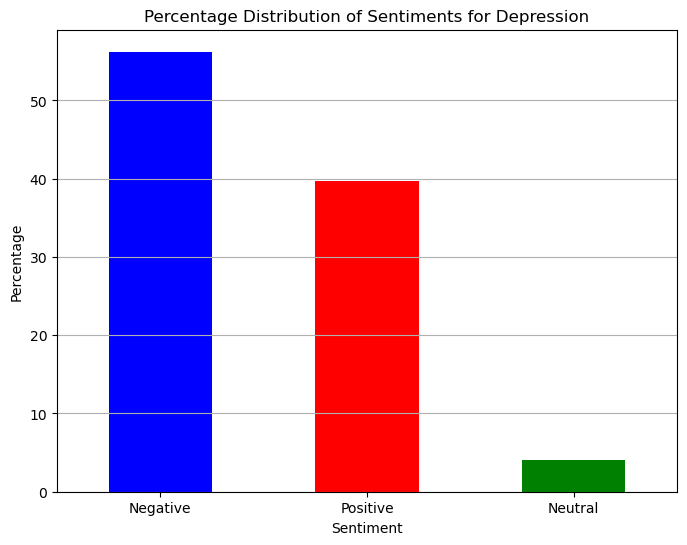


Percentage Distribution of Sentiments for depression:
sentiment
Negative    56.224900
Positive    39.759036
Neutral      4.016064
Name: proportion, dtype: float64


In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import matplotlib.pyplot as plt


# Function to remove punctuation
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

# Applying punctuation removal and storing the cleaned text
df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying VADER sentiment analysis on cleaned text
df['sentiment_scores'] = df['clean_msg'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound scores (overall sentiment) from sentiment_scores
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorize_sentiment function to create 'sentiment' column
df['sentiment'] = df['compound_score'].apply(categorize_sentiment)

# Calculate percentage distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100



# Visualization
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Percentage Distribution of Sentiments for Depression')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Displaying the percentage distribution table
print("\nPercentage Distribution of Sentiments for depression:")
print(sentiment_distribution)
